# P-ai AI/ML Workshop: Session 3

Welcome to P-ai's third session of the AI/ML workshop series! Today we'll learn about
- Gradient descent
- A host of new machine learning algorithms to try out
- How to use Git and GitHub

<img src="https://images.squarespace-cdn.com/content/5d5aca05ce74150001a5af3e/1580018583262-NKE94RECI46GRULKS152/Screen+Shot+2019-12-05+at+11.18.53+AM.png?content-type=image%2Fpng" width="200px">

### Python warm-up

Write a function that takes in a list `arr` and a search value `v`. The function returns the first value in `arr` that is closest to `v`. For example, `findClosest([1, 4, 7, 1], 2) -> 1`.

In [1]:
def findClosest(arr, v):
    pass

## 0. Session 2 Review

Here are some key points from last week's session:
- Supervised learning, unsupervised learning, reinforcement learning
    - Supervised: have labeled data, want model to predict $y$ from $X$ (e.g. predict house price from picture)
    - Unsupervised: don't have labeled data, want to learn patterns directly in data (e.g. clustering)
    - Reinforcement: want to train agent to perform actions in an environment that optimize some reward (e.g. play Mario)
- Linear regression
    - Used to predict a value from ≥1 input variable(s)
    - Expects linear relationship between input and output
- Logistic regression
    - Used to predict a binary class (0 or 1) from ≥1 input variable(s)
    - Finds linear decision boundary to separate data from different classes

## 1. Gradient descent
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/Chocolate_Hills_overview.JPG/1200px-Chocolate_Hills_overview.JPG" width="500px">

What's gradient descent, and why are we talking about it now? This is actually one answer to a question that was posed in the previous two workshops, but which we didn't have time to answer in detail:

> *How* do machine learning models find the optimal parameters?

There's an asterisk here, because not all machine learning algorithms use gradient descent, like decision trees (which we'll cover later today). That being said, it's pretty pervasive in machine learning and absolutely crucial in deep learning. Let's get started!

Imagine you're blind, and you're standing on the side of a hill. You want to go downward- how do you know which way to go? You can feel with your feet *which direction the slope is*, and then go in the opposite direction of the upward slope. You then *walk some distance* in that direction, and *repeat the process*. That's pretty much it! Gradient descent is a fairly intuitive process.

> So what do the hills represent?

The hills represent **loss** (reminder: loss is a synonym for cost; the thing you want to minimize). If we're sticking with three dimensions for the sake of visualizing, that means that if you pick two coordinates (say, $x$ and $y$), there's a height (loss) associated with those coordinates. Also recall that in the case of 2D linear regression, we want to find a **weight** and a **bias**; let's use $w$ and $b$ as our variables. Also, we'll call the loss $J$ (it's just convention). That means that we want to find:
$$
J(w, b)_{min}
$$
**\[WARNING\] CALCULUS INCOMING**  
(If you're not comfortable with calculus, don't worry about this next stuff– but if you want to get as concrete as possible, this is for you)

Mathematically, slope can be found by taking the *derivative* of a function. When you take the partial derivative of a function in all directions, that's called the *gradient*. The gradient of a function is a *vector* that points in the **direction of steepest ascent**. So, to go *down the gradient*, we would ideally wish to find the gradient of the loss function with respect to the weights, then take the *negative of the gradient* (direction of steepest descent), and update the weights in that direction.

Here's that same statement, written more in more math-y terms:
$$
w \leftarrow w - \alpha \nabla J
$$
Where $\leftarrow$ means "set equal to", $\nabla$ is the symbol for taking the gradient, and alpha ($\alpha$) is what's called the **learning rate**. The learning rate decides *how much* to update the weight based on the gradient. Let's try to visualize this a little better; here's an example where the loss ($J$) is a function of only one variable:

<img src="https://miro.medium.com/max/1200/1*iNPHcCxIvcm7RwkRaMTx1g.jpeg" width="400px">

You can see that the weight is inialized all the way at the left, and it computes the gradient (in one dimension, this is just the derivative times the $\hat{w}$ unit vector), and goes in the opposite direction, scaled by some amount ($\alpha$). Eventually, it reaches a local minimum.

> Why doesn't the weight get updated once it reaches the local minimum?

Because, at the local minimum, the gradient is 0 in all directions. That means that $\alpha \nabla J = 0$, so $w$ doesn't update.

Let's take a peek at an example with two input variables:

<img src="https://i.stack.imgur.com/TbZwC.png" width="500px">

In this example, you can see that there are multiple local minima, and vanilla gradient descent stops once it finds one, even if it isn't the *global* minimum. Don't forget what the "surface" is: it's the *loss* as a function of the model parameters, and we want to find *which* parameters result in the *lowest* loss so the model can *learn* the data best.

(Side note: there are ways of avoiding the "stuck in a local minimum problem, like introducing *momentum*. A very common optimizer that uses momentum is called <a href="https://ruder.io/optimizing-gradient-descent/index.html#adam">Adam</a>)

Okay! Enough of that for now, let's summarize what all of this was about:

- Loss is a function of the model parameters, like weights and biases
    - That is, there are certain combinations of parameters that minimize loss $\approx$ maximize "learning"
- Gradient is like slope, but it has a direction (always points in the direction of steepest ascent)
- To find a minimum (global, hopefully, but not necessarily), we "descend" the "gradient"
- At each step, the model makes a prediction and uses the difference between the predicted and actual value to estimate the gradient
- The weights are then updated accordingly to incrementally decrease the loss, and the process repeats

## 2. Some more (supervised learning) algorithms!

Up until now, we've only covered linear regression and logistic regression. There's so many commonly used ML models for supervised learning, we definitely won't have enough time to cover all of them in detail, but we can do a quick crash course through some of the most common ones, and you should feel free to experiment with these on your own later.

## 2.1. [K-Nearest Neighbors (KNN)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

<img src="https://miro.medium.com/max/1400/1*8Kfk4T5bsyCVU-jkHZYByg.png" width="500px">

K-Nearest Neighbors is potentially the most intuitive machine learning model in existence, and I'm almost sorry we didn't start with KNN instead of linear and logistic regression, but I guess that just means you're ahead of the curve now. Anyway, let's get a bit of intuition about KNN:

### Intuition
KNN is predicated on a very simple observation:

> Birds of a feather flock together

Or, as Mocky once sang (and Vulfpeck later covered):

> [Birds of a feather rock together](https://www.youtube.com/watch?v=sUAb1W_z1SE)

Or, as we might interprete that:

> Data from the same class have similar features

Let's say you want to predict whether an email is spam or not based on the number of typos and the word count. If you had a bunch of data and plotted it, you might see that the "spam" data points group together in the "low word count and many typos" corner. If I gave you a new email and placed it on the plot, you could pretty easily guess its legitimacy based on where it sits compared to the known spam vs. non-spam emails. If it lands right in the middle of the "spam" cluster, you'd probably label it as "spam", and vice versa. This is the whole idea behind KNN, just a little more formalized.

> **Algorithm**: To determine which class a new data point belongs to, choose the k nearest neighbors, where k is a (typically odd) positive integer. The class of the new point is the class which most of the neighbors belong to.

Note that $k=1$ is literally "nearest neighbor"; a new unlabeled data point just gets the class of the nearest data point. If you chose $k=3$, you would look at the three nearest neighbors, and they would "vote" on the class of the new data point.

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png" width="500px">

### Pros and cons

- <u>Pros</u>:
    - Simple and intuitive
    - No training necessary
- <u>Cons</u>:
    - As the dataset grows, time to find nearest neighbors slows down
    - Curse of dimensionality! (more on this to come later)
    - To use regular (Euclidean) distance, all input variables should have the same units
    - Performs poorly on unbalanced data
    
### Example
We'll use [sklearn's implementation of KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [18]:
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [65]:
def plot_classification_data(X_data, y_data, n_classes, labels=None):
    classes = np.array([[row for j, row in enumerate(X_data) if y_data[j] == i] for i in range(n_classes)])
    for i, class_i in enumerate(classes):
        plt.scatter(class_i[:, 0], class_i[:, 1], label=f"class {i}")
    plt.legend()
    if labels is None:
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
    plt.show()

In [64]:
def plot_guesses(X, y_pred, y_actual, labels=None):
    correct = np.array([row for i, row in enumerate(X) if y_pred[i] == y_actual[i]])
    incorrect = np.array([row for i, row in enumerate(X) if y_pred[i] != y_actual[i]])
    if correct.shape[0]:
        plt.scatter(correct[:, 0], correct[:, 1], c="g", label=f"correct")
    if incorrect.shape[0]:
        plt.scatter(incorrect[:, 0], incorrect[:, 1], c="r", label=f"incorrect")
    plt.legend()
    if labels is None:
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
    plt.show()

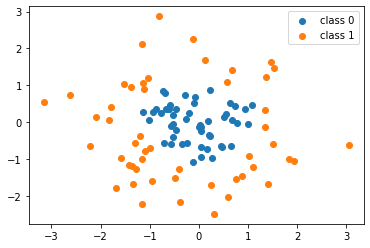

In [19]:
from sklearn.datasets import make_gaussian_quantiles
# Create dataset
X_gauss, y_gauss = datasets.make_gaussian_quantiles(n_features=2, 
                                n_classes=2, 
                                random_state=12,
                                n_samples=100)
plot_classification_data(X_gauss, y_gauss, n_classes=2)

In [9]:
# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_gauss, y_gauss)

In [138]:
# Fit model with k=5
k = 5
neigh = neighbors.KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [139]:
# Example prediction
samples_to_predict = [[-1, -2], [0.5, 0]]
for sample_to_predict in samples_to_predict:
    prediction = neigh.predict([sample_to_predict])
    print(f"The model predicted that the sample {sample_to_predict} belongs to class {prediction[0]}")

The model predicted that the sample [-1, -2] belongs to class 1
The model predicted that the sample [0.5, 0] belongs to class 0


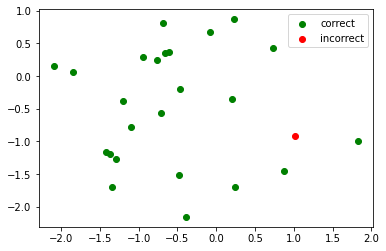

In [140]:
y_pred = neigh.predict(X_test)
plot_guesses(X_test, y_pred, y_test)

In [141]:
# Get test accuracy
neigh.score(X_test, y_test)

0.96

As you can see, the model can't be perfect because there's some overlap between the two classes. Still, this might be as well as we could expect any model to perform without overfitting!

## 2.2. [Naive Bayes (NB)](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
<img src="https://i.imgur.com/utT5nAr.jpg" width="400px">

Naive Bayes is a simple, but often surprisingly powerful algorithm used for classification and regression. There are two main flavors, Multinomial Naive Bayes (MNB) and Gaussian Naive Bayes (GNB). The main difference is that MNB works best with discrete features (e.g. word counts) and GNB works best with roughly normal (i.e. from a bell curve) features. Naive Bayes is typically very fast and lightweight.

### Intuition

The cornerstone of Naive Bayes is what's called Bayes' Theorem, and it looks like this:

$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
$$

This basically says, *the probability of A given B is the probability of B given A, times the probability of A, divided by the probability of B.* As an example, let's assume the following:

- 60% of college students like pizza
- 15% of college students are majoring in CS
- 80% of CS majors like pizza

If you meet a college student who likes pizza, what is the probability that they are a CS major?

$$
\begin{aligned}
P(CS|Pizza) &= \frac{P(Pizza|CS)P(CS)}{P(Pizza)} \\
P(CS|Pizza) &= \frac{0.8 \times 0.15}{0.6} \\
P(CS|Pizza) &= 0.2
\end{aligned}
$$

So there is a 20% chance that a given college student is a CS major given they like pizza. You can also expand upon this concept to allow for multiple input variables (i.e. $P(A|B_1 \wedge B_2 \wedge B_3 ...)$, or in words, "the probability of $A$ given $B_1$ *and* $B_2$ *and* $B_3$ etc...).

### Pros and Cons

<u>Pros</u>:
- Tends to be resistant to noise (e.g. irrelevant features, outliers)
- Since NB is extremely efficient, it works very well on large datasets
- Scales linearly (size of model grows with size of the dataset), which is realistically ideal
- Works well with high-dimensional data

<u>Cons</u>:
- Must be used on non-correlated input features (more on this below)
- Often requires a good amount of data for the statistics to work out

The main con has to do with why Naive Bayes is called "naive": it makes a very strong assumption about the input data. Namely, it assumes that **all input features are independent of each other**. In "real-world" applications, this is pretty rare. For example, you theoretically wouldn't be able to include `age` and `weight` as features because age and weight are correlated. Still, ML engineers like ignoring statistical conditions, so there's no rule against using NB anyway, just know that it may affect the model's performance.

<img src="images/nb-meme.png" width="400px">

### Example

We'll use the [sklearn implementation of Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) for this example.

In [142]:
from sklearn import naive_bayes

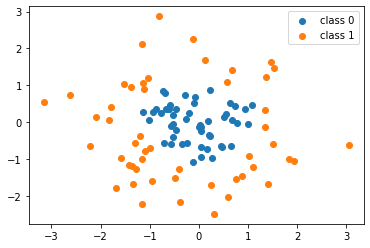

In [143]:
plot_classification_data(X_gauss, y_gauss, n_classes=2)

In [144]:
from sklearn.naive_bayes import GaussianNB
# Create GNB classifier
clf = GaussianNB()
# Fit classifier to training data- remember there are many parameters you can pass in, check the documentation!
clf.fit(X_train, y_train)

GaussianNB()

In [145]:
# Example prediction
samples_to_predict = [[-1, -2], [0.5, 0]]
for sample_to_predict in samples_to_predict:
    prediction = clf.predict([sample_to_predict])
    print(f"The model predicted that the sample {sample_to_predict} belongs to class {prediction[0]}")

The model predicted that the sample [-1, -2] belongs to class 1
The model predicted that the sample [0.5, 0] belongs to class 0


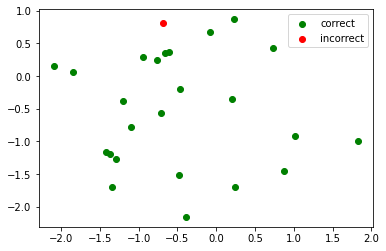

In [146]:
y_pred = clf.predict(X_test)
plot_guesses(X_test, y_pred, y_test)

In [147]:
# Get test accuracy
clf.score(X_test, y_test)

0.96

## 2.3. [Decision Tree](https://scikit-learn.org/stable/modules/tree.html) & [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
### Intuition
Decision trees are another example of intuitive machine learning models. To classify an example, the algorithm asks a series of "questions" about it, and assigns it a label based on the "answers" to those questions. Take a look at the following decision tree for classifying fruit:

<img src="https://miro.medium.com/max/698/1*zDqdNSWEqcRym1D8SLAmhw.jpeg" width="500px">

So in other words, a decision tree is basically a flow chart. However, in a vanilla decision tree, the "questions" must all be binary (e.g. `fruit_length > 2` can only be `True` or `False`).

But how does the model learn which questions to ask? Basically, during training, the model follows an algorithm to determine which questions will be the most "decisive"; that is, will best separate one class from another. To gain some intuition, let's imagine two games of 20 Questions:

**Player 1**  
Q1. Is it alive? `Yes`  
Q2. Is it composed of cells? `Yes`  
Q3. Does it live on Earth? `Yes`  
...

**Player 2**  
Q1. Is it alive? `Yes`  
Q2. Does it live underwater? `Yes`  
Q3. Is it a mammal? `Yes`  
...

It should be obvious that Player 2 is the superior guesser, but why? Player 2 chooses questions whose answers will roughly cut in half the number of possible "things" the answer can be. The perfect question is one whose answer completely determines what the answer is. For example:

Q1. Is it alive? `Yes`  
Q2. Does it live underwater? `Yes`  
Q3. Is it a mammal? `Yes`  
Q4. Can it also live on land? `No`  
Q5. **Are they the largest mammals on Earth?** `Yes => whale; No => dolphin`

Player 1, on the other hand, asked questions that added no new information, since it doesn't split the possible space of "things" at all.

Decision trees train in a similar way, typically using something called the [gini impurity](https://www.analyticsvidhya.com/blog/2021/03/how-to-select-best-split-in-decision-trees-gini-impurity/). Gini impurity is a measure of how well the question separates examples of different classes in the dataset.

<img src="https://miro.medium.com/max/1200/1*z7tK94rGGIy_42UpiqilLQ.png" width="500px">

If you were trying to predict whether passengers aboard the Titanic survived or died, you can imagine that a question like `"Did their last name start with an A?"` would be a poor choice, since the first letter of their last name likely has little to do with their survival, and so it would split the passengers more or less randomly (the first picture above).

### Pros and cons
<u>Pros</u>:
- Intuitive
- Explainable
- Usually doesn't require normalization

<u>Cons</u>:
- Tends to overfit (unstable)
- Small change in data can greatly affect tree structure (unstable)
- Doesn't work well on regression problems

### Example
Good old scikit-learn; we'll be using [their implementation of the decision tree algorithm](https://scikit-learn.org/stable/modules/tree.html).

In [148]:
from sklearn import tree

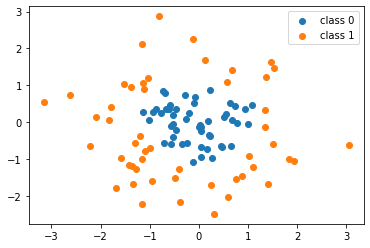

In [149]:
plot_classification_data(X_gauss, y_gauss, n_classes=2)

In [150]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [151]:
# Example prediction
samples_to_predict = [[-1, -2], [0.5, 0]]
for sample_to_predict in samples_to_predict:
    prediction = clf.predict([sample_to_predict])
    print(f"The model predicted that the sample {sample_to_predict} belongs to class {prediction[0]}")

The model predicted that the sample [-1, -2] belongs to class 1
The model predicted that the sample [0.5, 0] belongs to class 0


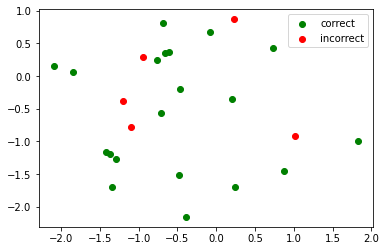

In [153]:
y_pred = clf.predict(X_test)
plot_guesses(X_test, y_pred, y_test)

In [154]:
# Get test accuracy
clf.score(X_test, y_test)

0.8

### Random Forest

Random forest is an example of **ensemble learning**; a model that uses multiple different models to contribute to a single answer. In particular, random forest is a collection of independent decision trees that each "cast a vote" as to what the classification is, and the random forest chooses the label with the most "votes". This generally helps prevent some of the instability issues of a single decision tree, at the expense of more computation.

<img src="https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg" width="500px">

As usual, let's try an example with [sklearn's implementation of the random forest algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [156]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

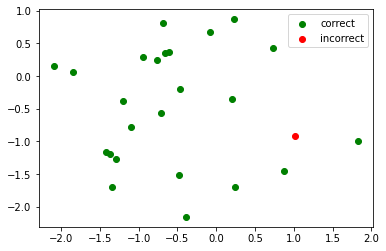

In [157]:
y_pred = clf.predict(X_test)
plot_guesses(X_test, y_pred, y_test)

In [158]:
# Get test accuracy
clf.score(X_test, y_test)

0.96

As expected, the random forest model outperforms a single decision tree. Let's move on to our last algorithm for today!

## 2.4. [Support Vector Machine (SVM)](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)

Support Vector Machines include Support Vector Classification (SVC) and Support Vector Regression (SVR), so you can actually use this model for both classification and regression tasks! We'll focus on SVC because it illustrates the main concept of the "support vector" better, but don't forget that SVMs to regression, too.

### Intuition

Let's say you had never heard of apples or lemons, and you wanted to learn to distinguish the two. The general descriptions of the two fruits might be `"apples are red and round"` and `"lemons are yellow and oval"`. But, you might run into trouble with a yellow apple or a round, unripe lemon. So, instead of learning the general characteristics of each class, you might focus on the most "confusing" examples from each class, and use them to form a decision boundary. Those "confusing" examples are called **support vectors**.

<img src="https://miro.medium.com/max/1400/0*eH4sQUkJc8YT76jL.png" width="500px">

*To see a more in-depth analysis of SVM using this same analogy, check out [this Medium article](https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200).*

Using the support vectors, SVM finds the **optimal hyperplane** (read: best decision boundary) to separate the training data.

### Kernel trick

Like logistic regression, vanilla SVMs can only find linear decision boundaries. That being said, SVMs implement something called the "kernel trick" that can sometimes turn non-linearly separable data into linearly separable data! Here's some visual intuition for how it can work:

<img src="https://miro.medium.com/max/1400/1*mCwnu5kXot6buL7jeIafqQ.png" width="500px">

By applying a **kernel function** to our data (in this case, a Gaussian kernel function), we can map our original data into a higher dimensional space where our classes are linearly separable. Pretty cool, right?

### Pros and cons

<u>Pros</u>:  
- Effective in higher dimensions
- Fast at prediction
- Offers classification and regression

<u>Cons</u>:  
- Expensive (computationally) to train
- Results aren't very interpretable / explainable
- Don't scale very well to large datasets

### Example

You already know it; [sklearn implementation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)!

In [92]:
from sklearn.svm import SVC

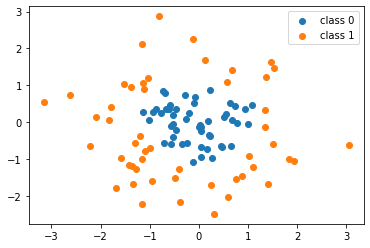

In [6]:
plot_classification_data(X_gauss, y_gauss, n_classes=2)

We'll use the RBF (Radial Basis Function) kernel; this is a pretty good default kernel to use. You can read more about it [here](https://towardsdatascience.com/radial-basis-function-rbf-kernel-the-go-to-kernel-acf0d22c798a)!

In [10]:
clf = SVC(kernel='rbf')
clf = clf.fit(X_train, y_train)

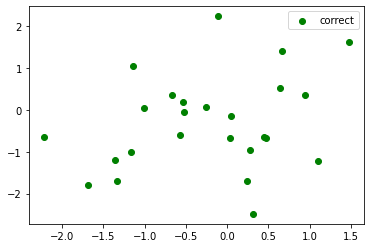

In [19]:
y_pred = clf.predict(X_test)
plot_guesses(X_test, y_pred, y_test)

In [12]:
# Get test accuracy
clf.score(X_test, y_test)

1.0

Wow, 100% test accuracy! Still, let's calm down a bit– this is a pretty small test set, and the dataset isn't that difficult. That being said, SVMs can be surprisingly powerful, and in many cases you might get better performance with one of these than a neural net.

## 2.5. ML algorithms review

We covered a lot of ground, so let's quickly wrap up the main idea for each ML algorithm:

Model name                       | Description (to classify an example, ...)
---------------------------------|------------
K Nearest Neighbors (KNN)        | Choose the majority class from its `k` nearest neighbors
Naive Bayes                      | Use Bayesian statistics
Decision Tree (DT)               | Use a tree of boolean criteria
Random Forest (RF)               | Use an ensemble of DTs to "vote" on the label
Support Vector Machine (SVM)     | Find the optimal hyperplane by identifying support vectors and applying a kernel

## 3. Case study

<img src="https://www.almanac.com/sites/default/files/image_nodes/iris-flowers.jpg" width="500px">

Let's try applying one (or a few) of these machine learning models on a "real world" problem. The dataset we'll be using is the [Iris Flower Dataset](https://www.kaggle.com/arshid/iris-flower-dataset/version/1), which is the "hello world" of machine learning. Let's take a look at this data:

In [8]:
import pandas as pd
import numpy as np

In [2]:
iris_data = pd.read_csv('data/iris.csv')

In [3]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Check all values for species
iris_data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

As we can see, we have four features (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`), and a species (one of `Iris-setosa`, `Iris-versicolor`, and `Iris-virginica`). Maybe we can try to predict which species a flower belongs to based on their petal / sepal features!

First, we should plot our data to see what we're getting ourselves into.

In [5]:
# Get column names as a List
columns = iris_data.columns
columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [44]:
# Get first four columns (X data)
X_data = iris_data[columns[:4]]
X_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
# Map from string species name to integer
mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

# Apply mapping to new column species_int
iris_data['species_int'] = iris_data['species'].transform(lambda x: mapping[x])
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species,species_int
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [13]:
y_data = iris_data['species_int']

Okay, now we're ready to plot the data. Notice that we have four input variables, but we can only show 2 variables on a 2D graph. In theory, there are 6 possible plots, but for convenience, we'll just plot `sepal_length` vs. `sepal_width`, and `petal_length` vs. `petal_width`.

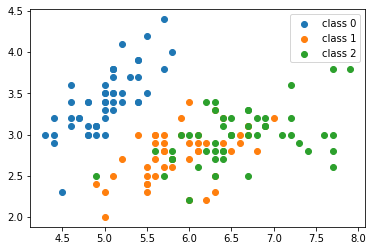

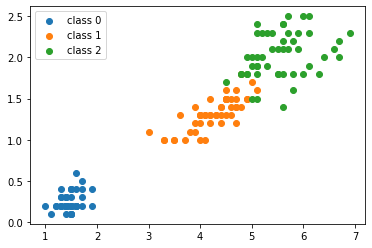

In [66]:
# Convert the data (as pandas Dataframes) into numpy arrays to get rid of the "extra stuff"
for (start_index, end_index) in ((0, 2), (2, 4)):
    plot_classification_data(
        X_data=np.array(X_data)[:,start_index:end_index],
        y_data=np.array(y_data), 
        n_classes=3, 
        labels=columns[start_index:end_index])

Alright! Right off the bat, we can see that class 0 (setosa) should be pretty easy to classify, but classes 1 and 2 (versicolor and virginica) have more overlap. Looking at the two plots, we can also see that versicolor and verginica are more separable when comparing petal length / width than when comparing sepal length. This is good to know!

In [50]:
# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)

So, which model should we use? Since there's definitely a spatial relationship here and all dimensions have the same units (`mm`), we might as well start with the simple KNN.

In [75]:
# Arbitrarily choose k = 3
knn_classifier = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
knn_classifier.score(X_test, y_test)

0.9473684210526315

So, our KNN classifier got almost 95% of the test dataset correct; that's pretty good! Let's take a look at where it tripped up.

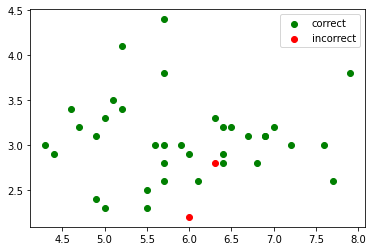

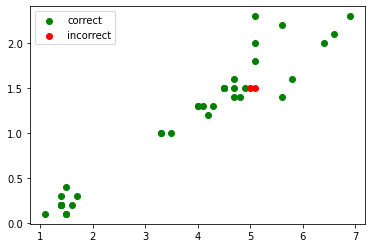

In [77]:
y_pred = knn_classifier.predict(X_test)
for (start_index, end_index) in ((0, 2), (2, 4)):
    plot_guesses(
        np.array(X_test)[:,start_index:end_index], 
        np.array(y_pred), 
        np.array(y_test),
        labels=columns[start_index:end_index])

While this plot is rather nice, it's hard to tell which species were misclassified. For this, we should use a **confusion matrix**. Here's an example of a confusion matrix:

<img src="https://miro.medium.com/max/1400/1*b5FxmrSTdcjnre99EdoNBQ.png" width="500px">

A confusion matrix tells us what the **true vs. actual** label of different examples were, so that we can see which labels the model misclassifies, and **how**. In the example above, the model appears to be learning to classify cats, dogs, and fish. The sample size is very small, but we can draw some insights about how the model is classifying. Here are a few examples:
- Every time the animal was a dog, the model correctly predicted a dog
- Most (86%) of the time the model predicted a dog, it was correct
- Most (88%) of the time the animal was actually a fish, the model correctly predicted a fish
- On the other hand, when the animal was a cat, the model was wrong 66% of the time because it mistook the cat for a fish
- Also, when the model predicted fish, 36% of the time, it was actually a cat

From this, we can see that the model is mostly confusing cats and fish; and that it tends to overclassify animals as fish.

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 16,  0],
       [ 0,  2,  9]])

That's our confusion matrix! Let's make it a bit prettier...

In [81]:
# Seaborn is built on top of matplotlib, more user-friendly (and generally better-looking)
!pip install seaborn
import seaborn as sns

You should consider upgrading via the '/Users/marcosacosta/Desktop/github/p-workshops-2021/venv/bin/python -m pip install --upgrade pip' command.


In [86]:
def compute_and_show_cm(y_actual, y_pred):
    cm = confusion_matrix(y_actual, y_pred)
    sns.heatmap(cm, annot=True)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.show()

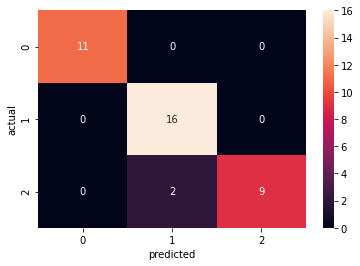

In [87]:
compute_and_show_cm(y_test, y_pred)

We now can clearly see that the model misclassified two virginicas as versicolor. What if we increase `k` to 5?

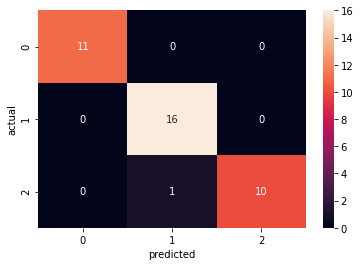

In [90]:
knn_classifier_2 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_classifier_2.fit(X_train, y_train)
y_pred_2 = knn_classifier_2.predict(X_test)
compute_and_show_cm(y_test, y_pred_2)

Now we're down to one misclassification– this isn't really a meaningful difference, but it's worth pointing out that we improved the performance of our model by trying a different **hyperparameter**. A hyperparameter is a parameter of our model that the model **doesn't learn through training**. The number of neighbors `k` in a KNN is something that we choose; the model doesn't learn. That's why, very often in machine learning, the next step after training a baseline model is tuning hyperparameters.

Just for the fun of it, let's try another model. What about SVM?

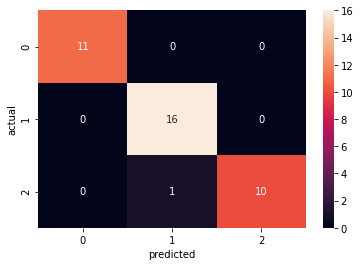

In [94]:
svc_classifier = SVC(kernel='rbf')
svc_classifier.fit(X_train, y_train)
y_pred_svm = svc_classifier.predict(X_test)
compute_and_show_cm(y_test, y_pred_svm)

So in this case, the SVM performs as well as a KNN with `k=5`. It's worth noting that our sample size is pretty small, so even if our SVM got 100% test accuracy, that might not be a meaningful difference over the KNN.

That's it for the case study– let me know if you have any questions!

## Git and GitHub

I created a Notion document that outlines all the essentials about git, and you can find it [here](https://www.notion.so/P-ai-Guide-to-Git-143ee9bedf7e4959ba7601e7f2861e7c)! If you follow the link, you'll find a video of me going through the git / GitHub workflow, which I'm sure many of you will prefer over a written document. If you're reading this right now in one of the in-person workshops, I'll be doing this demo now!

# See you next week!
<img src="https://en.meming.world/images/en/thumb/0/04/Adios_Wormhole.jpg/300px-Adios_Wormhole.jpg" width="500px">